#Importing Libraries & Setup

**Description**:  
This code snippet prepares the environment and imports the necessary dependencies for a Convolutional Neural Network (CNN)-based Pneumonia Prediction model. It begins by mounting Google Drive in the Colab environment to access datasets. The `archive.zip` file containing the dataset is then extracted to the specified location. Following this, essential libraries like NumPy, Pandas, OpenCV (`cv2`), Matplotlib, Seaborn, and Skimage are imported for data manipulation, visualization, and preprocessing. The Matplotlib style is set to 'ggplot' for a consistent plotting theme.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/archive.zip -d /content/dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: /content/dataset/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: /content/dataset/chest_

In [ ]:
import os, shutil
import random
import numpy as np
import pandas as pd
import cv2
import skimage
import matplotlib.pyplot as plt
import skimage.segmentation
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

1. **Class Labels and Image Size**:  
   - Defines labels `['PNEUMONIA', 'NORMAL']` and sets image size to `128x128`.

2. **Function `get_data`**:  
   - Loads, resizes, and labels images from a directory.  
   - Converts images to grayscale and handles errors during loading.  
   - Outputs a NumPy array of images with corresponding labels.

3. **Dataset Preparation**:  
   - Creates training, testing, and validation datasets by calling `get_data` on respective directories.

4. **Additional Variables**:  
   - Lists Pneumonia files and stores the Pneumonia directory path for later use.

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']  # Class labels
img_size = 128  # Target size for resizing images

def get_data(data_dir):
    """
    Prepares the dataset by loading, resizing, and labeling images.

    Parameters:
    data_dir (str): Path to the directory containing image folders.

    Returns:
    np.array: A NumPy array containing resized images and their corresponding labels.
    """
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)  # Path to the label folder
        class_num = labels.index(label)  # Assign label index (0 or 1)

        for img in os.listdir(path):
            try:
                # Load image in grayscale
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    continue  # Skip if image loading fails

                # Resize image
                resized_arr = cv2.resize(img_arr, (img_size, img_size))

                # Append image and label to the dataset
                data.append([resized_arr, class_num])
            except Exception as e:
                # Log the error for debugging purposes
                print(f"Error loading image {img}: {e}")

    return np.array(data, dtype=object)  # Use dtype=object for mixed types (arrays + integers)

In [ ]:
train = get_data("/content/dataset/chest_xray/chest_xray/train")
test = get_data("/content/dataset/chest_xray/chest_xray/test")
val = get_data("/content/dataset/chest_xray/chest_xray/val")

In [ ]:
pneumonia = os.listdir("/content/dataset/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/dataset/chest_xray/train/PNEUMONIA"

# Visualizing 6 random pneumonia X-ray images

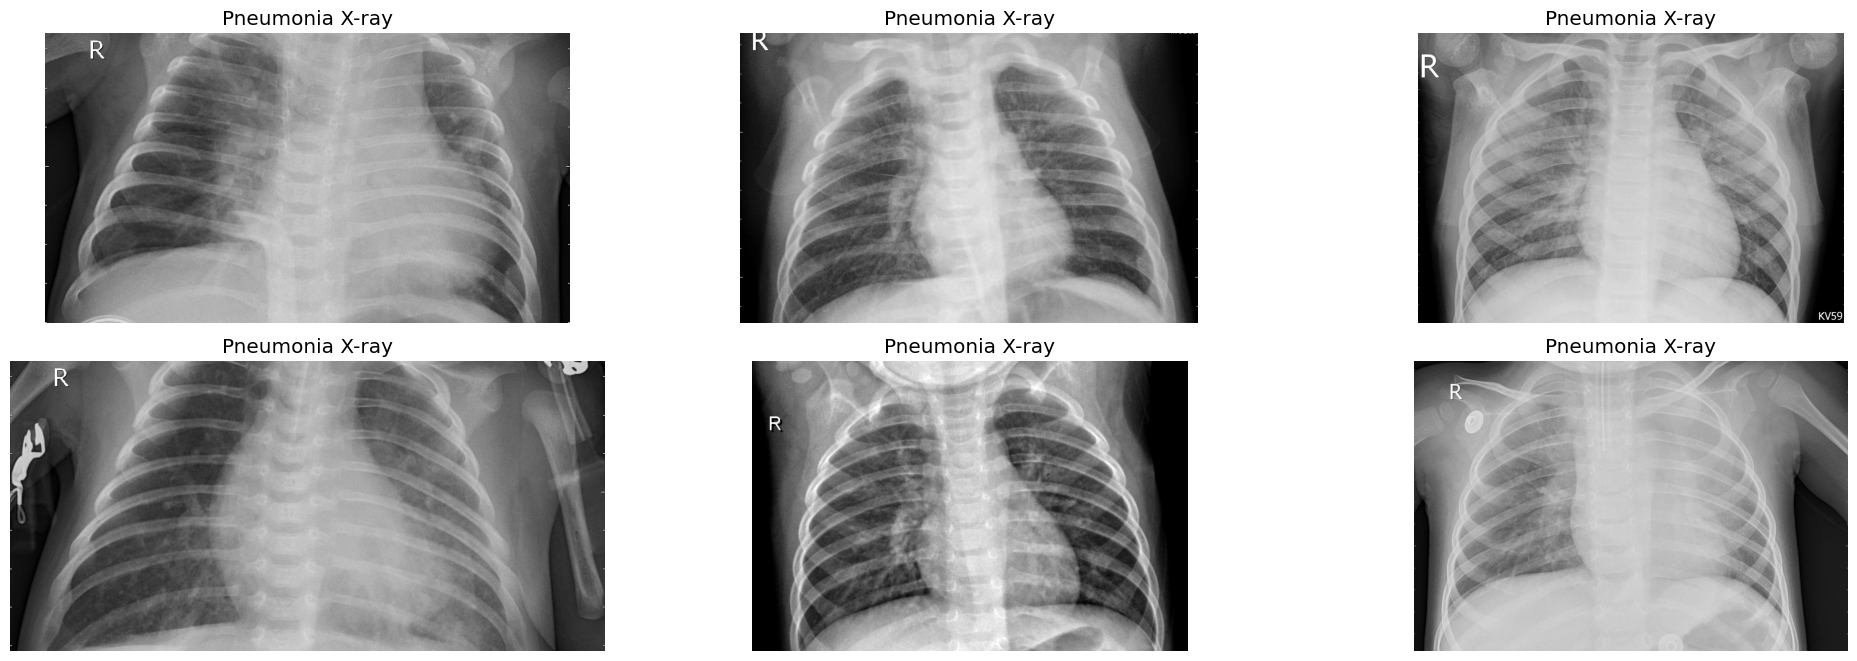

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img_path = os.path.join(pneumonia_dir, pneumonia[i])  # Gettig the path of the image
    img = plt.imread(img_path)  # Loading the image
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Pneumonia X-ray")

plt.tight_layout()
plt.show()

In [ ]:
normal = os.listdir("/content/dataset/chest_xray/train/NORMAL")
normal_dir = "/content/dataset/chest_xray/train/NORMAL"

# Visualizing 6 random normal X-ray images

1. **Figure Setup**:  
   - Creates a Matplotlib figure with a custom size of `20x10`.

2. **Subplot Creation**:  
   - Iterates through the first 6 images in the "NORMAL" directory.  
   - For each image, reads it from the specified path, loads it in grayscale, and displays it using `imshow`.

3. **Display Adjustments**:  
   - Hides axis labels for a cleaner view using `plt.axis('off')`.  
   - Adds the title "Normal X-ray" to each subplot for context.

4. **Layout Optimization**:  
   - Uses `plt.tight_layout` to adjust spacing for better visibility.  
   - Displays the figure with `plt.show()`.

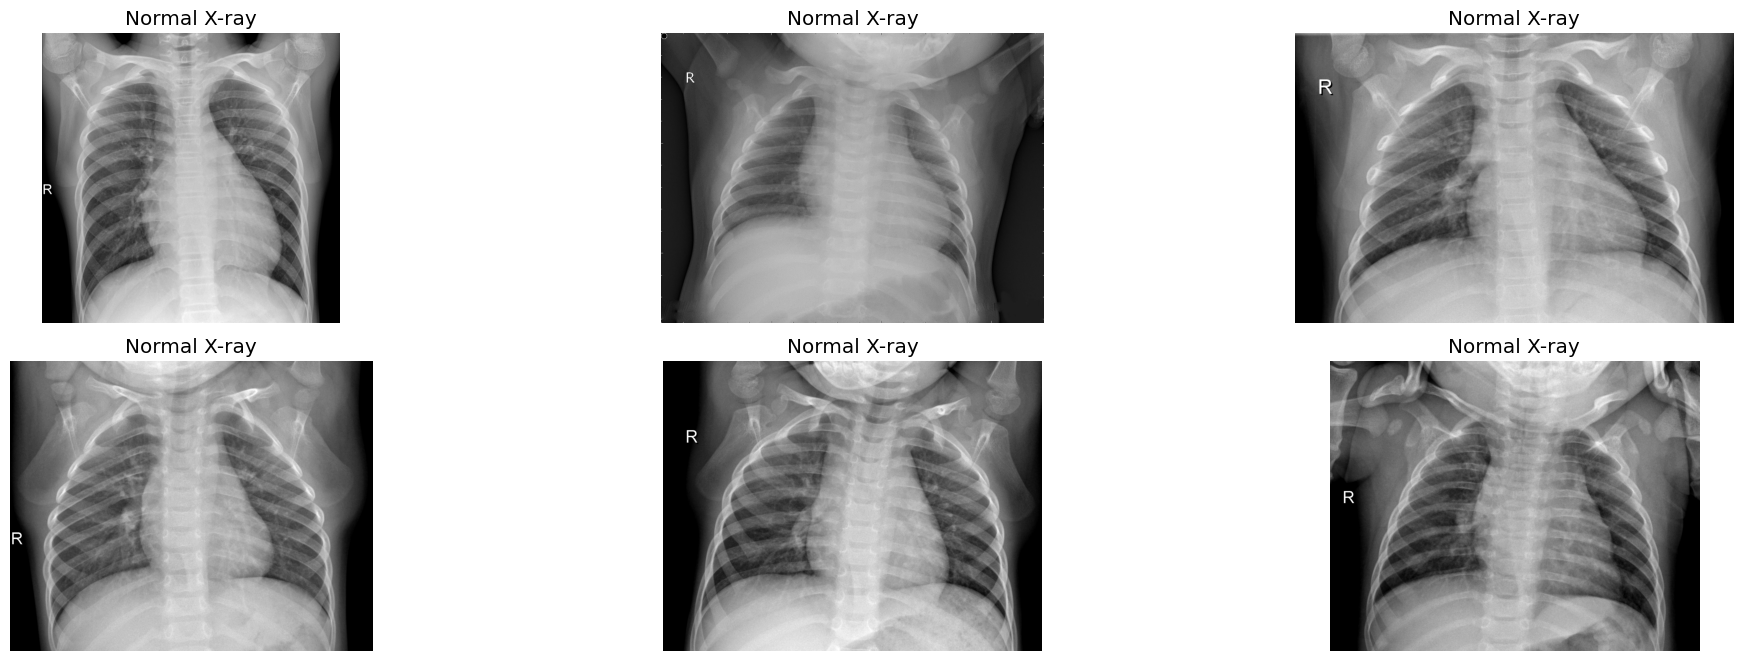

In [ ]:
plt.figure(figsize=(20, 10))

for i in range(6):
    plt.subplot(3, 3, i + 1)
    img_path = os.path.join(normal_dir, normal[i])  # Gettig the path of the image
    img = plt.imread(img_path)  # Loading the image
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Normal X-ray")

plt.tight_layout()
plt.show()

#Data distribution visualization

1. **Label Transformation**:  
   - Converts numeric class labels in the training data (`0` for Normal, `1` for Pneumonia) into human-readable strings (`"Normal"` or `"Pneumonia"`).

2. **Seaborn Countplot**:  
   - Plots the class distribution in the training dataset using a bar chart with `sns.countplot`.  
   - The `viridis` palette is applied for a visually distinct color scheme.

3. **Graph Customization**:  
   - Adds a title ("Class Distribution in Training Data") and labels for the x-axis ("Class") and y-axis ("Count").  
   - Font sizes for titles, labels, and ticks are adjusted for better readability.

4. **Visualization**:  
   - Displays the plot, highlighting the imbalance in the dataset with more Pneumonia samples than Normal ones.

<ipython-input-8-aa3ff2e309f1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=listx, palette="viridis")


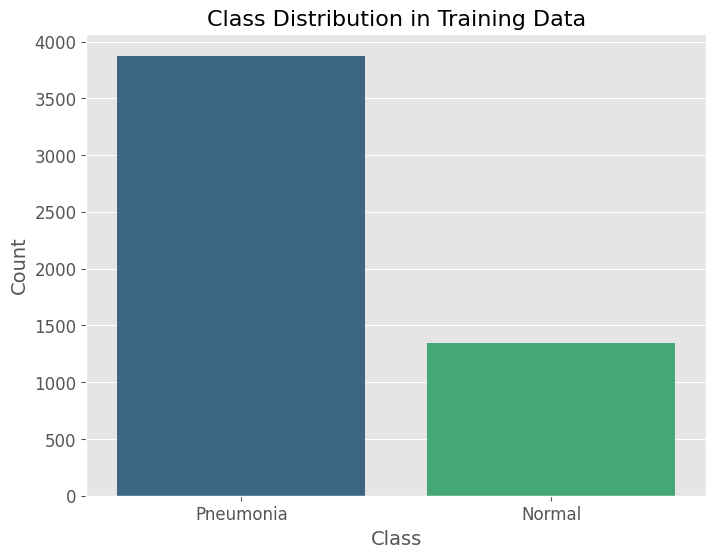

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transform numeric labels into human-readable class labels
listx = ["Pneumonia" if i[1] == 0 else "Normal" for i in train]

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=listx, palette="viridis")
plt.title("Class Distribution in Training Data", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Counting Images in Pneumonia Dataset Folders

1. **Purpose**:  
   - Counts the number of image files in the "PNEUMONIA" and "NORMAL" folders within the dataset directory.

2. **Functionality**:  
   - Uses `os.walk` to traverse the directory structure.  
   - Filters files by extensions (`.png`, `.jpg`, `.jpeg`).  
   - Focuses only on folders containing "PNEUMONIA" or "NORMAL" in their path.

3. **Output**:  
   - Returns a dictionary of folder paths and their image counts.  
   - Displays the count of images for each folder in a readable format.  

4. **Use Case**:  
   - Provides an overview of the dataset’s distribution to ensure data balance before training a model.

In [ ]:
import os

def count_images_in_folders(base_path):
    folder_counts = {}
    for root, dirs, files in os.walk(base_path):
        if any(folder in root for folder in ["PNEUMONIA", "NORMAL"]):
            folder_name = root.split(os.sep)[-1]
            folder_counts[root] = len([f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))])
    return folder_counts

base_path = '/content/dataset/chest_xray'
image_counts = count_images_in_folders(base_path)

# Display the counts
for folder, count in image_counts.items():
    print(f"{folder}: {count} images")

/content/dataset/chest_xray/val/NORMAL: 8 images
/content/dataset/chest_xray/val/PNEUMONIA: 8 images
/content/dataset/chest_xray/chest_xray/val/NORMAL: 8 images
/content/dataset/chest_xray/chest_xray/val/PNEUMONIA: 8 images
/content/dataset/chest_xray/chest_xray/train/NORMAL: 1341 images
/content/dataset/chest_xray/chest_xray/train/PNEUMONIA: 3875 images
/content/dataset/chest_xray/chest_xray/test/NORMAL: 234 images
/content/dataset/chest_xray/chest_xray/test/PNEUMONIA: 390 images
/content/dataset/chest_xray/__MACOSX/chest_xray/val/NORMAL: 8 images
/content/dataset/chest_xray/__MACOSX/chest_xray/val/PNEUMONIA: 8 images
/content/dataset/chest_xray/__MACOSX/chest_xray/train/NORMAL: 1341 images
/content/dataset/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA: 3875 images
/content/dataset/chest_xray/__MACOSX/chest_xray/test/NORMAL: 234 images
/content/dataset/chest_xray/__MACOSX/chest_xray/test/PNEUMONIA: 390 images
/content/dataset/chest_xray/train/NORMAL: 1341 images
/content/dataset/ches

#Comparing Image Files Across Dataset Folders

1. **Purpose**:  
   - Identifies identical and unique images across different dataset folders (e.g., `train`, `test`, `val`) using MD5 hashing.

2. **Functionality**:  
   - **`get_image_hashes`**: Generates MD5 hashes for all image files in a specified folder and returns a dictionary of file paths and their hashes.  
   - **`compare_folders`**: Compares two folders by their image hashes, identifies identical files, and lists files unique to each folder.

3. **Process**:  
   - Iterates through dataset folders (`train`, `test`, `val`).  
   - Computes hashes for all images in these folders.  
   - Performs pairwise comparisons to check for duplicates or unique files between folder pairs.

4. **Output**:  
   - Prints the number of identical images and unique files for each folder pair.  
   - Provides insights into potential data leakage or overlaps across training, testing, and validation datasets.

In [ ]:
import os
import hashlib

base_path = '/content/dataset/chest_xray'

def get_image_hashes(folder_path):
    """
    Generates MD5 hashes for all images in a folder (including subfolders).

    Parameters:
    folder_path (str): Path to the folder containing images.

    Returns:
    dict: Dictionary with image file paths as keys and their MD5 hashes as values.
    """
    image_hashes = {}
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Process only image files
                file_path = os.path.join(root, file)
                with open(file_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    image_hashes[file_path] = file_hash
    return image_hashes

def compare_folders(folder1_path, folder2_path):
    """
    Compares images between two folders based on their MD5 hashes.

    Parameters:
    folder1_path (str): Path to the first folder.
    folder2_path (str): Path to the second folder.

    Returns:
    None: Prints the comparison results.
    """
    hashes_folder1 = get_image_hashes(folder1_path)
    hashes_folder2 = get_image_hashes(folder2_path)

    identical = set(hashes_folder1.values()) & set(hashes_folder2.values())
    unique_to_folder1 = set(hashes_folder1.values()) - set(hashes_folder2.values())
    unique_to_folder2 = set(hashes_folder2.values()) - set(hashes_folder1.values())

    print(f"Comparison between '{folder1_path}' and '{folder2_path}':")
    print(f"Identical Images: {len(identical)}")
    print(f"Unique to Folder 1: {len(unique_to_folder1)}")
    print(f"Unique to Folder 2: {len(unique_to_folder2)}")
    print("-" * 50)

# Paths to compare
location_based_folders = ["train", "test", "val"]
chest_xray_folders = [os.path.join("chest_xray", subfolder) for subfolder in location_based_folders]

# Perform pairwise comparison
for loc_folder, cx_folder in zip(location_based_folders, chest_xray_folders):
    folder1 = os.path.join(base_path, loc_folder)  # Location-based folder (e.g., /train, /test, /val)
    folder2 = os.path.join(base_path, cx_folder)  # chest_xray subfolder
    compare_folders(folder1, folder2)

Comparison between '/content/dataset/chest_xray/train' and '/content/dataset/chest_xray/chest_xray/train':
Identical Images: 5190
Unique to Folder 1: 0
Unique to Folder 2: 0
--------------------------------------------------
Comparison between '/content/dataset/chest_xray/test' and '/content/dataset/chest_xray/chest_xray/test':
Identical Images: 618
Unique to Folder 1: 0
Unique to Folder 2: 0
--------------------------------------------------
Comparison between '/content/dataset/chest_xray/val' and '/content/dataset/chest_xray/chest_xray/val':
Identical Images: 16
Unique to Folder 1: 0
Unique to Folder 2: 0
--------------------------------------------------


#Addressing the class imbalance issue

1. **Importing Libraries**:  
   - Imports `ImageDataGenerator` from TensorFlow Keras for data augmentation.  
   - Uses additional libraries like NumPy, OS, and Matplotlib for processing and file handling.  

2. **Paths and Directory Setup**:  
   - Defines paths for the "NORMAL" and "PNEUMONIA" image directories in the training dataset.  
   - Creates a new directory for storing augmented images if it does not exist.  

3. **Data Augmentation Configuration**:  
   - Configures `ImageDataGenerator` with parameters like rescaling, horizontal flipping, rotation, zooming, and width/height shifting to generate diverse augmented images.  

4. **Class Count and Oversampling**:  
   - Counts the images in each class and calculates the oversampling factor to balance the number of "NORMAL" images with "PNEUMONIA" images.  
   - Iterates through "NORMAL" images, generates augmented versions, and saves them in the designated directory until the dataset is balanced.  

5. **Output**:  
   - Prints the number of original images in each class and the total number of augmented "NORMAL" images created.  
   - Ensures a balanced dataset for training the CNN model.  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt

# Paths for the training dataset
normal_dir = '/content/dataset/chest_xray/chest_xray/train/NORMAL'
pneumonia_dir = '/content/dataset/chest_xray/chest_xray/train/PNEUMONIA'
augmented_dir = '/content/dataset/chest_xray/chest_xray/train/NORMAL_AUG'

# Ensure the augmented directory exists
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# Data augmentation generator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

# Count the images in each class
normal_count = len(os.listdir(normal_dir))
pneumonia_count = len(os.listdir(pneumonia_dir))
oversample_factor = pneumonia_count - normal_count

print(f"Normal Images: {normal_count}, Pneumonia Images: {pneumonia_count}")
print(f"Augmenting {oversample_factor} images to balance the dataset...")

# Oversampling: Generate augmented images for the Normal class
for img_name in os.listdir(normal_dir):
    if oversample_factor <= 0:
        break  # Stop once we've generated enough augmented images
    img_path = os.path.join(normal_dir, img_name)
    img = plt.imread(img_path)  # Load image

    # Check if the image is grayscale or RGB
    if len(img.shape) == 2:  # If grayscale, add a channel dimension
        img = np.expand_dims(img, axis=-1)

    # Expand dimensions to create a batch of size 1
    img = np.expand_dims(img, axis=0)

    # Generate augmented images
    for batch in datagen.flow(img, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpeg'):
        oversample_factor -= 1
        if oversample_factor <= 0:
            break

print(f"Augmented Normal Images: {len(os.listdir(augmented_dir))}")

Normal Images: 1342, Pneumonia Images: 3876
Augmenting 2534 images to balance the dataset...
Augmented Normal Images: 2241


#Data Generators for Training, Validation, and Testing

1. **Library Imports**:  
   - Imports essential TensorFlow Keras modules, including `ImageDataGenerator` for data preprocessing and `VGG19` for potential transfer learning.  
   - Includes optimizers (e.g., `SGD`, `RMSprop`, `Adam`) and callbacks (e.g., `ModelCheckpoint`, `EarlyStopping`, `ReduceLROnPlateau`).

2. **Data Augmentation**:  
   - Configures `ImageDataGenerator` for the training set with rescaling and various augmentation techniques (e.g., flipping, rotation, shear, and shift).  
   - Validation and test data generators are created with rescaling only.

3. **Data Generators**:  
   - Creates `train_generator`, `valid_generator`, and `test_generator` using `flow_from_directory`.  
   - Specifies parameters like `batch_size` (32), `target_size` (128x128), and `class_mode` (`categorical` for multi-class classification).  
   - Shuffles data for randomness and sets `color_mode` to `rgb`.

4. **Dataset Summary**:  
   - Reports the number of images found in each dataset:  
     - Training: 5216 images.  
     - Validation: 16 images.  
     - Testing: 624 images.  

5. **Purpose**:  
   - Prepares the dataset for training, validation, and testing in a structured and augmented manner, essential for the CNN model's performance.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode="nearest")
valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory("/content/dataset/chest_xray/train",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')
valid_generator = valid_datagen.flow_from_directory("/content/dataset/chest_xray/val",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory("/content/dataset/chest_xray/test",
                                 batch_size = 32,
                                 target_size=(128,128),
                                 class_mode = 'categorical',
                                 shuffle=True,
                                 seed = 42,
                                 color_mode = 'rgb')

Found 624 images belonging to 2 classes.


#Balancing and Structuring the Training Dataset

1. **Paths and Directories**:  
   - Defines paths for "NORMAL", "NORMAL_AUG", and "PNEUMONIA" datasets.  
   - Creates a new structured directory (`new_train`) for the balanced training dataset with subfolders for "NORMAL" and "PNEUMONIA".  

2. **Copying Images**:  
   - Copies all original "NORMAL" images into the new directory.  
   - Adds augmented "NORMAL" images to reach a total of 2400 "NORMAL" images.  

3. **Random Sampling for Pneumonia**:  
   - Randomly selects 3000 images from the "PNEUMONIA" dataset to ensure consistency and balance with the "NORMAL" class.  

4. **Final Dataset Summary**:  
   - Prints the total counts of "NORMAL" and "PNEUMONIA" images in the new training dataset.  
   - Verifies the directory structure and image distribution.  

5. **Purpose**:  
   - Prepares a balanced training dataset with 2400 "NORMAL" and 3000 "PNEUMONIA" images, reducing bias during model training.

In [ ]:
import os
import random
import shutil

# Paths
normal_dir = '/content/dataset/chest_xray/chest_xray/train/NORMAL'
augmented_normal_dir = '/content/dataset/chest_xray/chest_xray/train/NORMAL_AUG'
pneumonia_dir = '/content/dataset/chest_xray/chest_xray/train/PNEUMONIA'

# Target directory for the new training dataset
new_train_dir = '/content/dataset/chest_xray/new_train'
new_normal_dir = os.path.join(new_train_dir, 'NORMAL')
new_pneumonia_dir = os.path.join(new_train_dir, 'PNEUMONIA')

# Ensure directories exist
os.makedirs(new_normal_dir, exist_ok=True)
os.makedirs(new_pneumonia_dir, exist_ok=True)

# Copy all original normal images
normal_images = os.listdir(normal_dir)
for img in normal_images:
    shutil.copy(os.path.join(normal_dir, img), os.path.join(new_normal_dir, img))

# Copy enough augmented normal images to reach 2400 total
augmented_normal_images = os.listdir(augmented_normal_dir)
needed_augmented_images = 2400 - len(normal_images)
selected_augmented_images = random.sample(augmented_normal_images, needed_augmented_images)

for img in selected_augmented_images:
    shutil.copy(os.path.join(augmented_normal_dir, img), os.path.join(new_normal_dir, img))

# Randomly select 3000 pneumonia images
pneumonia_images = os.listdir(pneumonia_dir)
selected_pneumonia_images = random.sample(pneumonia_images, 3000)

for img in selected_pneumonia_images:
    shutil.copy(os.path.join(pneumonia_dir, img), os.path.join(new_pneumonia_dir, img))

print(f"Normal images: {len(os.listdir(new_normal_dir))}")
print(f"Pneumonia images: {len(os.listdir(new_pneumonia_dir))}")

Normal images: 2400
Pneumonia images: 3000


In [ ]:
# Verify directory structure and image count
for root, dirs, files in os.walk(new_train_dir):
    print(f"Root: {root}, Classes: {dirs}, Files: {len(files)}")


Root: /content/dataset/chest_xray/new_train, Classes: ['NORMAL', 'PNEUMONIA'], Files: 0
Root: /content/dataset/chest_xray/new_train/NORMAL, Classes: [], Files: 2400
Root: /content/dataset/chest_xray/new_train/PNEUMONIA, Classes: [], Files: 3000


#Data Generators for Augmented Training and Validation  

1. **Data Augmentation**:  
   - Configures `train_datagen` with rescaling and augmentation techniques like flipping, rotation, shear, and shifts to enrich the training dataset.  
   - Uses `valid_datagen` for validation with only rescaling to normalize pixel values.

2. **Training Generator**:  
   - Generates batches of augmented images from the `new_train` directory.  
   - Parameters include a target image size of `128x128`, batch size of 32, categorical class mode, and data shuffling for randomness.

3. **Validation Generator**:  
   - Generates validation images from the `val` directory with the same parameters as the training generator but without augmentation.

4. **Output**:  
   - Confirms the number of images found in the training (`5208`) and validation (`16`) datasets.  
   - Prepares the datasets for training and validation in the CNN model.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Generators
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   horizontal_flip=0.4,
                                   vertical_flip=0.4,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   fill_mode="nearest")
valid_datagen = ImageDataGenerator(rescale=1. / 255)

# Training Generator
train_generator = train_datagen.flow_from_directory(
    directory='/content/dataset/chest_xray/new_train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Validation Generator
valid_generator = valid_datagen.flow_from_directory(
    directory='/content/dataset/chest_xray/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)


Found 5398 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
class_labels = train_generator.class_indices

In [ ]:
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
class_name = {value:key for (key, value) in class_labels.items()}

In [ ]:
class_name

{0: 'NORMAL', 1: 'PNEUMONIA'}

#Transfer Learning with VGG19 and Custom Layers  

1. **Base Model**:  
   - Loads the VGG19 model with `imagenet` pre-trained weights and excludes the top classification layers (`include_top=False`).  
   - Sets the input shape to `128x128x3` for compatibility with the dataset.  
   - Freezes all layers of the base model to retain pre-trained features.

2. **Custom Layers**:  
   - Adds a flattening layer to reduce the dimensionality of the base model's output.  
   - Includes fully connected (`Dense`) layers with ReLU activation and dropout for regularization.  
   - Final output layer has a softmax activation for 2-class classification (Normal and Pneumonia).

3. **Model Assembly**:  
   - Combines the base model and custom layers to create the final model (`model_01`).  
   - Prints the model summary to verify its architecture.

4. **Purpose**:  
   - Leverages transfer learning with VGG19 to build an efficient CNN for Pneumonia classification.

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Base Model
base_model = VGG19(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False  # Freeze base model layers

# Add custom layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu')(flat)
dropout = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(dropout)
output = Dense(2, activation='softmax')(class_2)

# Final model
model_01 = Model(base_model.inputs, output)
model_01.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 43,065,218 (164.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

#Model Training with Callbacks and SGD Optimizer

1. **Callbacks**:  
   - **EarlyStopping**: Monitors validation loss (`val_loss`) and stops training if it doesn’t improve for 4 epochs.  
   - **ModelCheckpoint**: Saves the best model during training based on validation loss.  
   - **ReduceLROnPlateau**: Reduces the learning rate when validation accuracy plateaus, ensuring efficient learning.

2. **Optimizer**:  
   - Uses the Stochastic Gradient Descent (SGD) optimizer with a learning rate of `0.0001`, momentum (`nesterov=True`), and weight decay.

3. **Model Compilation**:  
   - Compiles the model using `categorical_crossentropy` as the loss function and accuracy as the evaluation metric.

4. **Model Training**:  
   - Trains the model for 10 epochs with a batch size defined in the generator.  
   - Incorporates the defined callbacks for efficient training and validation handling.  

5. **Purpose**:  
   - Implements a robust training pipeline with optimization and regularization to achieve better performance on the validation dataset.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

# Filepath to save the best model
filepath = "/content/model.keras"

# Define EarlyStopping
es = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=4)

# Define ModelCheckpoint
cp = ModelCheckpoint(filepath=filepath, monitor="val_loss", save_best_only=True, save_weights_only=False, mode="auto", save_freq="epoch")

# Define ReduceLROnPlateau
lrr = ReduceLROnPlateau(monitor="val_accuracy", patience=3, verbose=1, factor=0.5, min_lr=0.0001)

# Define SGD Optimizer
sgd = SGD(learning_rate=0.0001, decay=1e-6, nesterov=True)


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
# Compile the model
model_01.compile(
    loss="categorical_crossentropy",
    optimizer=sgd,
    metrics=["accuracy"]
)

# Train the model
history_01 = model_01.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=10,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 45s 638ms/step - accuracy: 0.5126 - loss: 0.7721 - val_accuracy: 0.5000 - val_loss: 0.6884 - learning_rate: 1.0000e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 0.5707 - loss: 0.6802

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 718ms/step - accuracy: 0.5708 - loss: 0.6802 - learning_rate: 1.0000e-04
Epoch 3/10
 2/50 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.4688 - loss: 0.6895

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 623ms/step - accuracy: 0.5770 - loss: 0.6686 - val_accuracy: 0.5625 - val_loss: 0.6580 - learning_rate: 1.0000e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6400 - loss: 0.6431 - learning_rate: 1.0000e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 540ms/step - accuracy: 0.6288 - loss: 0.6401 - val_accuracy: 0.8125 - val_loss: 0.6381 - learning_rate: 1.0000e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 461ms/step - accuracy: 0.6455 - loss: 0.6320 - learning_rate: 1.0000e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 538ms/step - accuracy: 0.6382 - loss: 0.6372 - val_accuracy: 0.8125 - val_loss: 0.6186 - learning_rate: 1.0000e-04
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.6825 - loss: 0.6107 - learning_rate: 1.0000e-04
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 84s 547ms/step - accuracy: 0.6610 - loss: 0.6250 - val_accuracy: 0.8125 - val_loss: 0.6047 - learning_rate: 1.0000e-04
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 24

In [ ]:
import os

# Ensure the directory exists
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")

# Save the model using the .keras format
model_01.save(filepath="model_weights/vgg19_model_01.keras", overwrite=True)


In [ ]:
model_01.load_weights("model_weights/vgg19_model_01.keras")

vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.8125 - loss: 0.5957
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.6923 - loss: 0.6181


In [ ]:
print(f"Validation Loss: {vgg_val_eval_01[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_01[1]}")
print(f"Test Loss: {vgg_test_eval_01[0]}")
print(f"Test Accuarcy: {vgg_test_eval_01[1]}")

Validation Loss: 0.5860834121704102
Validation Accuarcy: 0.75
Test Loss: 0.6146875619888306
Test Accuarcy: 0.6987179517745972


#Transfer Learning and Fine-Tuning with VGG19  

1. **Transfer Learning**:  
   - Initializes a VGG19 base model with pre-trained `imagenet` weights, excluding the top layers.  
   - Freezes all base model layers to retain pre-trained features.  
   - Adds custom layers, including dense layers with ReLU activation, dropout for regularization, and a softmax output for binary classification.

2. **Model Compilation and Training**:  
   - Compiles the model with the Adam optimizer (`learning_rate=0.001`) and `categorical_crossentropy` as the loss function.  
   - Includes callbacks:  
     - **ModelCheckpoint**: Saves the best model based on `val_loss`.  
     - **EarlyStopping**: Stops training if validation loss does not improve for 3 epochs.  
   - Trains the model for 5 epochs on the dataset and evaluates its performance on the test set.

3. **Fine-Tuning**:  
   - Unfreezes the last block of VGG19 (`block5_`) to enable learning in deeper layers.  
   - Recompiles the model with a smaller learning rate (`0.0001`) for gradual fine-tuning.  
   - Trains incrementally for 5 more epochs with the same callbacks and evaluates the updated model on the test set.

4. **Purpose**:  
   - Combines transfer learning and fine-tuning to leverage pre-trained features while refining deeper layers for improved performance on Pneumonia classification.  

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load VGG19 with frozen layers
base_model = VGG19(include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze all layers

# Add custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(4608, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1152, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.inputs, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint("model_weights/frozen_model.keras", save_best_only=True, monitor="val_loss", mode="min")
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    epochs=5,  # Train for a few epochs
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Test the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Epoch 1/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 536ms/step - accuracy: 0.7040 - loss: 1.6239 - val_accuracy: 0.7500 - val_loss: 0.6136
Epoch 2/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 90s 507ms/step - accuracy: 0.8629 - loss: 0.3245 - val_accuracy: 0.8125 - val_loss: 0.3474
Epoch 4/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 89s 507ms/step - accuracy: 0.8830 - loss: 0.2752 - val_accuracy: 0.8125 - val_loss: 0.2998
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.8809 - loss: 0.3322
Test Loss: 0.33969399333000183, Test Accuracy: 0.8717948794364929


In [ ]:
# Unfreeze the last block of the base model
for layer in base_model.layers:
    if layer.name.startswith("block5_"):
        layer.trainable = True

# Recompile the model with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Smaller learning rate for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    epochs=5,  # Train incrementally
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Test the model after fine-tuning
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Epoch 1/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 98s 521ms/step - accuracy: 0.8268 - loss: 0.4678 - val_accuracy: 0.7500 - val_loss: 0.3887
Epoch 2/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 99us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 490ms/step - accuracy: 0.9146 - loss: 0.2233 - val_accuracy: 0.8750 - val_loss: 0.3514
Epoch 4/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 152s 544ms/step - accuracy: 0.9279 - loss: 0.1740 - val_accuracy: 0.9375 - val_loss: 0.2463
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.9207 - loss: 0.2826
Test Loss: 0.28576093912124634, Test Accuracy: 0.9118589758872986


In [ ]:
model.save("model_weights/vgg19_fine_tuned_block5_91.keras")

#Fine-Tuning with Block4 of VGG19  

1. **Unfreezing Specific Layers**:  
   - Unfreezes the `block4_` layers of the VGG19 model for fine-tuning deeper features while retaining frozen layers from previous blocks.

2. **Recompilation**:  
   - Recompiles the model with an even smaller learning rate (`0.00001`) to prevent overfitting and enable gradual adjustments during fine-tuning.  

3. **Incremental Training**:  
   - Trains the model incrementally for 5 epochs using the training and validation generators.  
   - Employs callbacks, including `ModelCheckpoint` and `EarlyStopping`, for efficient and monitored training.  

4. **Evaluation**:  
   - Tests the fine-tuned model on the test dataset and prints the loss and accuracy.  

5. **Purpose**:  
   - Refines the model’s performance by allowing adjustments in intermediate layers, leveraging pre-trained knowledge while focusing on dataset-specific features.  

In [ ]:
for layer in base_model.layers:
    if layer.name.startswith("block4_"):
        layer.trainable = True

# Recompile the model with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=0.00001),  # Even smaller learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_block4 = model.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    epochs=5,  # Train incrementally
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

# Test the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


Epoch 1/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 103s 540ms/step - accuracy: 0.9335 - loss: 0.1700 - val_accuracy: 0.8750 - val_loss: 0.4170
Epoch 2/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 129s 497ms/step - accuracy: 0.9528 - loss: 0.1313 - val_accuracy: 0.9375 - val_loss: 0.2495
Epoch 4/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 149s 539ms/step - accuracy: 0.9557 - loss: 0.1185 - val_accuracy: 0.9375 - val_loss: 0.2346
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.9160 - loss: 0.3129
Test Loss: 0.2986111342906952, Test Accuracy: 0.9118589758872986


In [ ]:
model.save("model_weights/vgg19_fine_tuned_block4_91.keras")

#Regularization and Fine-Tuning to Mitigate Overfitting

**Regularization Enhancements**  
- Introduces L2 regularization (`kernel_regularizer=l2(0.0001)`) in dense layers to penalize large weights and reduce overfitting.  
- Adjusts dropout rate to reduce aggressive regularization.  
- Recompiles the model with a slightly increased learning rate (`0.0005`) for better convergence during retraining.

In [ ]:
from tensorflow.keras.regularizers import l2

# Adjust custom layers with less aggressive regularization
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu', kernel_regularizer=l2(0.0001))(flat)  # Reduce L2 penalty
dropout = Dropout(0.3)(class_1)  # Decrease dropout
class_2 = Dense(1152, activation='relu', kernel_regularizer=l2(0.0001))(dropout)
output = Dense(2, activation='softmax')(class_2)

# Update the model
model = Model(inputs=base_model.inputs, outputs=output)

# Recompile
model.compile(
    optimizer=Adam(learning_rate=0.00005),  # Increase learning rate slightly
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**Incremental Fine-Tuning in Block3**  
- Gradually unfreezes layers in `block3_conv3` of the VGG19 model, starting with one layer to avoid overwriting pre-trained features.  
- Recompiles the model and trains it for 5 epochs with callbacks (`ModelCheckpoint` and `EarlyStopping`).  
- Maintains a smaller learning rate (`0.00005`) for precise fine-tuning of earlier layers.

In [ ]:
# Gradually unfreeze layers in block3
for layer in base_model.layers:
    if layer.name == "block3_conv3":  # Start with one layer
        layer.trainable = True

# Recompile and train
model.compile(
    optimizer=Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_block3_partial = model.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    epochs=5,
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 108s 569ms/step - accuracy: 0.7304 - loss: 1.1853 - val_accuracy: 0.8125 - val_loss: 0.7273
Epoch 2/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 115us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 132s 530ms/step - accuracy: 0.9253 - loss: 0.6152 - val_accuracy: 0.6875 - val_loss: 1.4811
Epoch 4/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 141s 535ms/step - accuracy: 0.9314 - loss: 0.4904 - val_accuracy: 0.8750 - val_loss: 0.5879


**Loss Trend Visualization**  
- Plots the training and validation loss trends across epochs using Matplotlib.  
- Helps assess the model’s training stability and overfitting by comparing the loss curves.  
- Provides insights into the effectiveness of regularization and fine-tuning strategies.

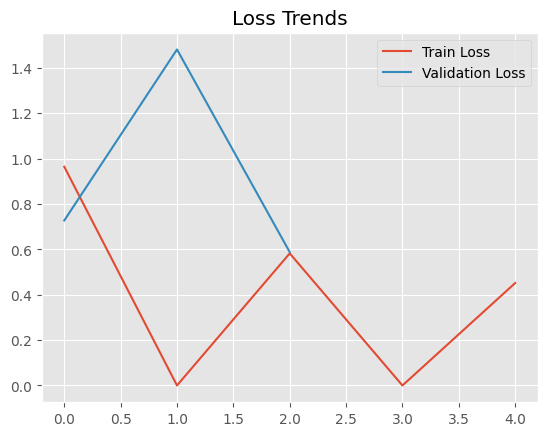

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_block3_partial.history['loss'], label='Train Loss')
plt.plot(history_block3_partial.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Trends')
plt.show()


#Full Network Fine-Tuning with Regularization and Callbacks  

1. **Model Initialization**:  
   - Loads the VGG19 base model with pre-trained `imagenet` weights and unfrozen layers to enable full network fine-tuning.  
   - Adds custom dense layers with L2 regularization (`l2(0.0001)`) for weight penalties and dropout (`0.4`) for stability.  
   - Combines the base model and custom layers into `model_03` and loads pre-trained weights from a previous training phase.

2. **Callbacks Setup**:  
   - **ReduceLROnPlateau**: Dynamically reduces the learning rate when validation loss plateaus, ensuring efficient learning.  
   - **ModelCheckpoint**: Saves the best model weights (`vgg19_finetuned_full.keras`) based on the minimum validation loss.  
   - **EarlyStopping**: Stops training when validation loss does not improve for 6 epochs, restoring the best weights.

3. **Purpose**:  
   - Fine-tunes the entire network with regularization to minimize overfitting and employs advanced callbacks to optimize training performance and convergence.

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Load base model
base_model = VGG19(include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True  # Unfreeze the entire network

# Add custom layers
x = base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation='relu', kernel_regularizer=l2(0.0001))(flat)  # Add L2 regularization
dropout = Dropout(0.4)(class_1)  # Increased dropout for stability
class_2 = Dense(1152, activation='relu', kernel_regularizer=l2(0.0001))(dropout)
output = Dense(2, activation='softmax')(class_2)

# Define the model
model_03 = Model(inputs=base_model.inputs, outputs=output)

# Load pre-trained weights
model_03.load_weights("model_weights/vgg19_model_01.keras")


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Define callbacks
lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-7
)
checkpoint = ModelCheckpoint(
    "model_weights/vgg19_finetuned_full.keras",
    save_best_only=True,
    monitor="val_loss",
    mode="min"
)
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True,
    verbose=1
)


#Data Generators for Training, Validation, and Testing

1. **Data Augmentation for Training**:  
   - Configures `train_datagen` with data augmentation techniques such as reduced rotation (`20`), slight width and height shifts (`0.1`), zooming (`0.2`), and horizontal flipping.  
   - Normalizes image pixel values by rescaling to a range of 0 to 1.

2. **Generators Setup**:  
   - **Training Generator**: Reads images from the `new_train` directory with a target size of `128x128`, batch size of 32, and categorical class mode.  
   - **Validation Generator**: Reads validation images from the `val` directory with the same parameters but without augmentation.  

3. **Test Generator**:  
   - Reads test images from the `test` directory.  
   - Maintains `shuffle=False` to preserve the order of test data for evaluation consistency.  

4. **Purpose**:  
   - Prepares augmented training data to improve model generalization while maintaining clean validation and test datasets for unbiased evaluation.  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,  # Reduce rotation
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    directory="/content/dataset/chest_xray/new_train",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

valid_generator = valid_datagen.flow_from_directory(
    directory="/content/dataset/chest_xray/val",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical"
)

test_generator = valid_datagen.flow_from_directory(
    directory="/content/dataset/chest_xray/test",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 5398 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#Fine-Tuning the Model with a Low Learning Rate  

1. **Compilation**:  
   - Compiles the model with the Adam optimizer using a very small learning rate (`0.00001`) to stabilize training during fine-tuning.  
   - Uses `categorical_crossentropy` as the loss function for multi-class classification and accuracy as the evaluation metric.

2. **Training**:  
   - Trains the model incrementally for 15 epochs while monitoring performance on both training and validation datasets.  
   - Employs callbacks like `lr_scheduler`, `checkpoint`, and `early_stopping` to dynamically adjust learning rate, save the best model, and halt training early if validation performance stops improving.

3. **Purpose**:  
   - Allows precise adjustments to weights in fine-tuning while preventing overfitting by leveraging advanced callbacks and a conservative learning rate.  

In [ ]:
model_03.compile(
    optimizer=Adam(learning_rate=0.00001),  # Small learning rate for fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
history = model_03.fit(
    train_generator,
    validation_data=valid_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    epochs=15,  # Train for more epochs with early stopping
    callbacks=[lr_scheduler, checkpoint, early_stopping],
    verbose=1
)


Epoch 1/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 145s 708ms/step - accuracy: 0.8457 - loss: 1.0938 - val_accuracy: 0.7500 - val_loss: 1.3867 - learning_rate: 1.0000e-05
Epoch 2/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 3/15


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


169/169 ━━━━━━━━━━━━━━━━━━━━ 94s 526ms/step - accuracy: 0.9470 - loss: 0.8468 - val_accuracy: 0.6875 - val_loss: 1.4559 - learning_rate: 1.0000e-05
Epoch 4/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 5/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 140s 525ms/step - accuracy: 0.9636 - loss: 0.7747 - val_accuracy: 0.6250 - val_loss: 1.6448 - learning_rate: 1.0000e-05
Epoch 6/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 7/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 153s 584ms/step - accuracy: 0.9735 - loss: 0.7240 - val_accuracy: 0.8125 - val_loss: 1.1155 - learning_rate: 1.0000e-05
Epoch 8/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-05
Epoch 9/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 131s 529ms/step - accuracy: 0.9663 - loss: 0.7085 - val_accuracy: 0.6250 - val_loss: 1.2856 - learning_rate: 1.0000e-05


#Model Evaluation and Metrics Calculation  

1. **Test Evaluation**:  
   - Evaluates the model on the test dataset to calculate test loss and accuracy.  
   - Prints the test performance metrics for overall evaluation.

2. **Prediction Generation**:  
   - Extracts the true labels (`y_true`) from the test generator.  
   - Generates predicted probabilities (`y_pred_probs`) and converts them to class labels (`y_pred`) using `argmax`.

3. **Classification Report**:  
   - Displays a detailed classification report, including precision, recall, F1-score, and support for each class using `classification_report`.

4. **ROC-AUC Score**:  
   - Computes and prints the Receiver Operating Characteristic Area Under the Curve (ROC-AUC) score to evaluate the model's discriminative performance.

5. **Purpose**:  
   - Provides a comprehensive evaluation of the model's performance on the test set, enabling insights into its classification accuracy and overall reliability.  

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Test evaluation
test_loss, test_acc = model_03.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

# Generate predictions
y_true = test_generator.classes
y_pred_probs = model_03.predict(test_generator)
y_pred = y_pred_probs.argmax(axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ROC-AUC
roc_auc = roc_auc_score(y_true, y_pred_probs[:, 1])
print(f"ROC-AUC: {roc_auc}")


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.8573 - loss: 1.0133
Test Loss: 0.8725459575653076, Test Accuracy: 0.9006410241127014
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 242ms/step
              precision    recall  f1-score   support

      NORMAL       0.94      0.79      0.86       234
   PNEUMONIA       0.88      0.97      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624

ROC-AUC: 0.9683431952662722


#Saving Model Weights to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Path to save models in Google Drive
google_drive_path = '/content/drive/My Drive/model_weights'

# Create the directory if it doesn't exist
os.makedirs(google_drive_path, exist_ok=True)


In [ ]:
import shutil

# Source folder (current location of model weights)
source_folder = '/content/model_weights'

# Copy all files to Google Drive
shutil.copytree(source_folder, google_drive_path, dirs_exist_ok=True)
print(f"All models have been saved to {google_drive_path}")


All models have been saved to /content/drive/My Drive/model_weights


In [ ]:
os.listdir(google_drive_path)

['vgg19_fine_tuned_block5_91.keras',
 'frozen_model.keras',
 'vgg19_finetuned_full.keras',
 'vgg19_fine_tuned_block4_91.keras',
 'vgg19_model_01.keras',
 '.ipynb_checkpoints']